# Open histograms from a ROOT file
The aim of this notebook is to show how to open a 2D ROOT histogram from a [Geant4 simulation](https://gitlab.com/lperna386/master-thesis/-/tree/Simulations?ref_type=heads) saved in a ROOT file.

Let's start by importing the required modules

In [4]:
import uproot
import numpy as np

import matplotlib.pyplot as plt


## Let's inspect the file

We can see that there are two Ntuples (two matrices) `outData` and `crossPos`. Just for informations, there are two different ntuples because they have a different number of rows.

Furthermore there are two Histograms: `crossingPos` and `crossingWeigh`

In [5]:
with uproot.open("../CERN2022-build/out_data/tbeamdata0000.root") as f:
    for k in f:
        print(k)
        try:
            for kk in f[k]:
                print(kk)
        except:
            pass
        
    print(f.describe())

outData;1
<TBranch 'NEvent' at 0x7f32bf6c0c40>
<TBranch 'Tracker_NHit_X_0' at 0x7f32bf6c0b50>
<TBranch 'Tracker_NHit_Y_0' at 0x7f32bf6e52b0>
<TBranch 'Tracker_NHit_X_1' at 0x7f32bf6cf400>
<TBranch 'Tracker_NHit_Y_1' at 0x7f32bf6cfb20>
<TBranch 'Tracker_X_0' at 0x7f32bf6ef400>
<TBranch 'Tracker_Y_0' at 0x7f32bf6efcd0>
<TBranch 'Tracker_X_1' at 0x7f32bf6cda30>
<TBranch 'Tracker_Y_1' at 0x7f32bf6cd160>
<TBranch 'GammaCal_EDep_CC' at 0x7f32bf6d97c0>
<TBranch 'GammaCal_EDep_TL' at 0x7f32bf6e80d0>
<TBranch 'GammaCal_EDep_TR' at 0x7f32bf6e89a0>
<TBranch 'GammaCal_EDep_BL' at 0x7f32bf6e4d60>
<TBranch 'GammaCal_EDep_BR' at 0x7f32bf6e4490>
<TBranch 'GammaCal_EDep_CL' at 0x7f32bf6a4b80>
<TBranch 'GammaCal_EDep_CR' at 0x7f32bf6a42b0>
<TBranch 'CrystalA_EDep' at 0x7f32bf69e9a0>
<TBranch 'CrystaB_EDep' at 0x7f32bf69e0d0>
<TBranch 'CrystalC_EDep' at 0x7f32bf678850>
crossPos;1
<TBranch 'EvID' at 0x7f32bf67d7c0>
<TBranch 'Xcrossing' at 0x7f32bf692160>
<TBranch 'Ycrossing' at 0x7f32bf692a30>
<TBranch 'P

This is my colormap for logz histograms, for coloring the zeros as ones.

In [6]:
import matplotlib as mpl
import copy 

my_cmap = copy.copy(mpl.cm.jet) # copy the default cmap
my_cmap.set_bad(my_cmap(0))

# Exploring the histogram object

Let's have a look in more detail to one histogram, and extract relevant informations

In [7]:
with uproot.open("../CERN2022-build/out_data/tbeamdata0000.root")["crossingWeigh"] as f:
    a = f.all_members
    print(a.keys()) # Print what's inside
        
    # Directly access the bins and height matrix
    b = f.to_numpy()
    for i in range(len(b)):
        print(b[i].shape)
    

# Extract bins and height matrix
hh = b[0]
binsx = b[1]
binsy = b[2]
bincx = binsx[:-1] + (binsx[1] - binsx[0])/2
bincy = binsy[:-1] + (binsy[1] - binsy[0])/2

dict_keys(['@fUniqueID', '@fBits', 'fName', 'fTitle', 'fLineColor', 'fLineStyle', 'fLineWidth', 'fFillColor', 'fFillStyle', 'fMarkerColor', 'fMarkerStyle', 'fMarkerSize', 'fNcells', 'fXaxis', 'fYaxis', 'fZaxis', 'fBarOffset', 'fBarWidth', 'fEntries', 'fTsumw', 'fTsumw2', 'fTsumwx', 'fTsumwx2', 'fMaximum', 'fMinimum', 'fNormFactor', 'fContour', 'fSumw2', 'fOption', 'fFunctions', 'fScalefactor', 'fTsumwy', 'fTsumwy2', 'fTsumwxy', 'fN'])
(300, 300)
(301,)
(301,)


# Plot of the histogram

A simple example of how to plot the istogram

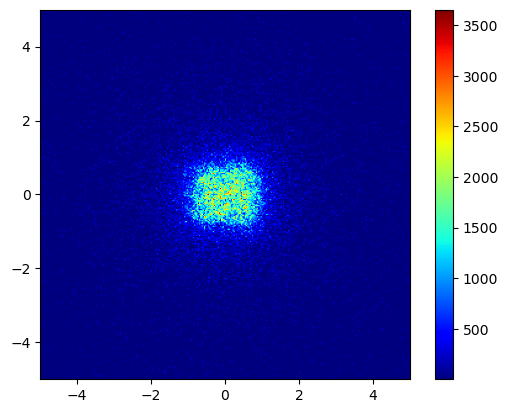

In [10]:
# %matplotlib widget
%matplotlib inline
fig, ax = plt.subplots()

prof = ax.imshow(hh.T, cmap = my_cmap, origin = "lower",
                   extent = (binsx.min(), binsx.max(), binsy.min(), binsy.max()))

fig.colorbar(prof, ax = ax)
plt.show()
